In [1]:
import sys, os

# Add project_root to sys.path so Python can find `scripts/`
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from scripts.features_engineering import quicky_data, lag_features_indicators
from scripts.pipelines import price_model
from scripts.predict import future_price_prediction
from scripts.lstm import LSTMModel, FeatureSelfAttnLSTMForecast
from scripts.helper import CustomizedLoss
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import torch.nn as nn

In [3]:
scaler = StandardScaler()
model_type = LSTMModel
criterion = nn.MSELoss()

In [4]:
# 📂 Load dataset
file_path_1 = "../ready_data/cleaned_vn_index_data.csv"
df_1 = pd.read_csv(file_path_1)
df_1 = quicky_data(df_1)

In [5]:
df_1.columns

Index(['VN_Index_Close', 'Total Volume', 'Total Value',
       'Total Foreigner Buy Volume', 'Total Foreigner Buy Value',
       'Total Foreigner Sell Volume', 'Total Foreigner Sell Value', 'trend',
       'seasonal', 'residual'],
      dtype='object')

2025-05-11 23:50:00 [INFO] Epoch 00 – Train Loss: 1.0067 – Test Loss: 0.2872
2025-05-11 23:50:07 [INFO] Epoch 01 – Train Loss: 0.9516 – Test Loss: 0.0538
2025-05-11 23:50:13 [INFO] Epoch 02 – Train Loss: 0.6119 – Test Loss: 0.1181
2025-05-11 23:50:20 [INFO] Epoch 03 – Train Loss: 0.5109 – Test Loss: 0.0539
2025-05-11 23:50:26 [INFO] Epoch 04 – Train Loss: 0.2873 – Test Loss: 0.1012
2025-05-11 23:50:32 [INFO] Epoch 05 – Train Loss: 0.1797 – Test Loss: 0.0137
2025-05-11 23:50:39 [INFO] Epoch 06 – Train Loss: 0.1384 – Test Loss: 0.0294
2025-05-11 23:50:46 [INFO] Epoch 07 – Train Loss: 0.1070 – Test Loss: 0.0570
2025-05-11 23:50:53 [INFO] Epoch 08 – Train Loss: 0.0917 – Test Loss: 0.0095
2025-05-11 23:51:00 [INFO] Epoch 09 – Train Loss: 0.0908 – Test Loss: 0.0681
2025-05-11 23:51:07 [INFO] Epoch 10 – Train Loss: 0.0924 – Test Loss: 0.0569
2025-05-11 23:51:14 [INFO] Epoch 11 – Train Loss: 0.0917 – Test Loss: 0.0815
2025-05-11 23:51:21 [INFO] Epoch 12 – Train Loss: 0.0796 – Test Loss: 0.0401

Final: Training Loss: 0.0989 - Test Loss: 0.0077
RMSE: 28.1889, MAE: 24.7581, R²: -8.2173, Directional Accuracy: 0.0000


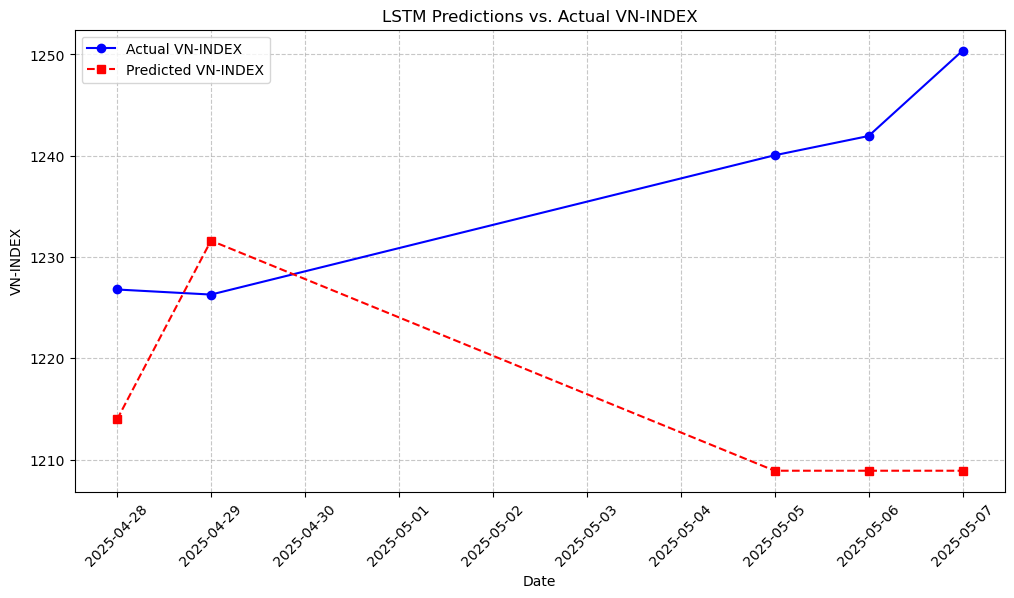

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-04-28      1226.800049         1213.968018
1 2025-04-29      1226.300049         1231.620972
2 2025-05-05      1240.050049         1208.910889
3 2025-05-06      1241.949951         1208.910889
4 2025-05-07      1250.369995         1208.910889
torch.Size([1, 5, 1])
[1218.6041 1214.5579 1192.0123 1192.0123 1192.0123]


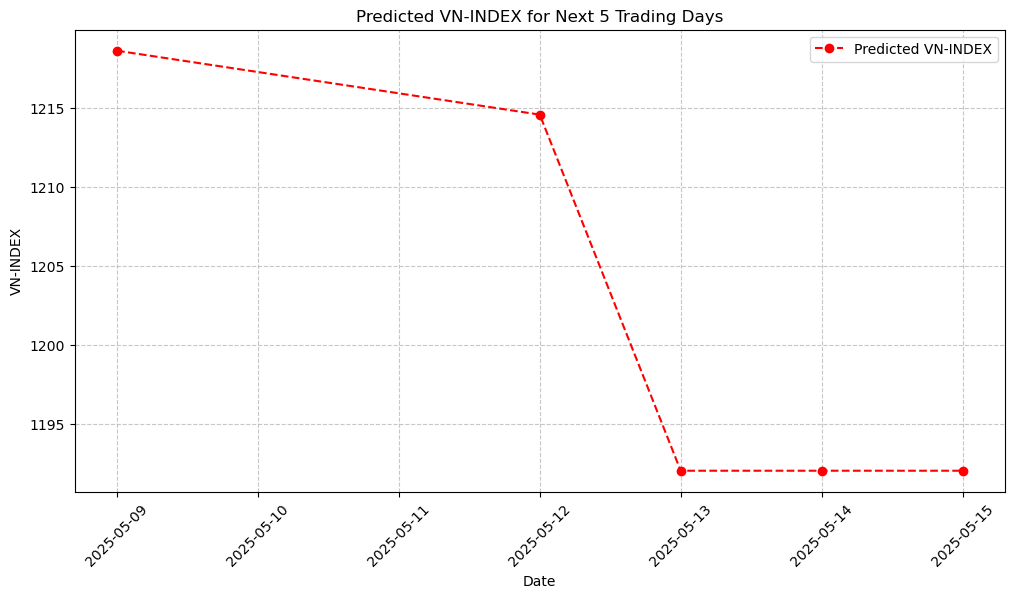

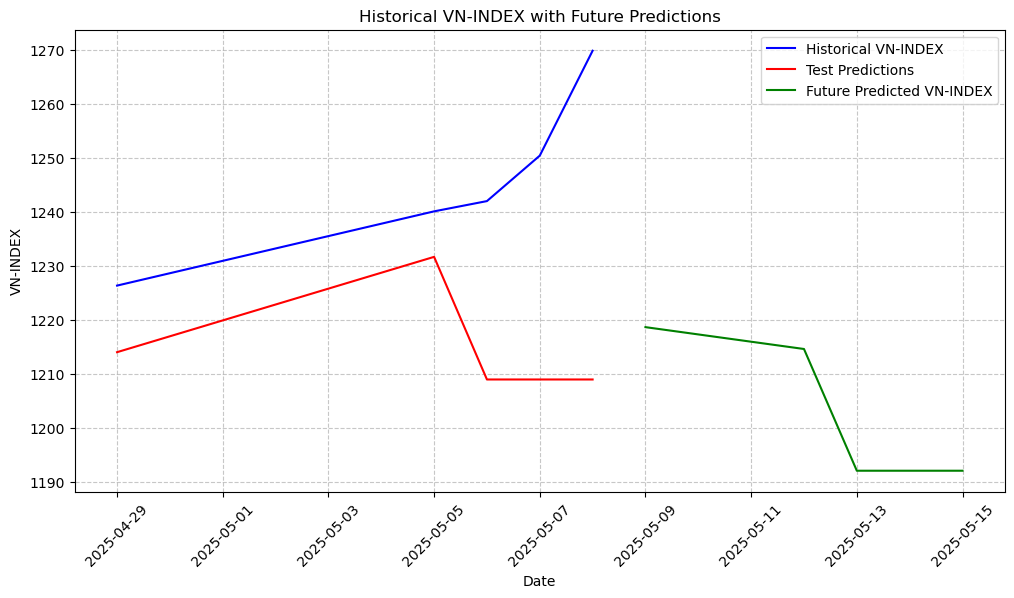

        Date  Predicted VN-INDEX
0 2025-05-09         1218.604126
1 2025-05-12         1214.557861
2 2025-05-13         1192.012329
3 2025-05-14         1192.012329
4 2025-05-15         1192.012329


In [6]:
# 📊 Select only VN-INDEX for prediction
data = df_1[["VN_Index_Close", 'trend',
       'seasonal', 'residual']]

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion, tuning=False)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=5)

In [7]:
# 📊 Select additional VN-INDEX statistics for prediction
data = df_1

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

[I 2025-05-11 23:56:14,754] A new study created in memory with name: no-name-f9062cfc-f0f4-4897-8491-6c302227ee8d
2025-05-11 23:56:26 [INFO] Epoch 00 – Train Loss: 0.7634 – Test Loss: 0.6043
2025-05-11 23:56:36 [INFO] Epoch 01 – Train Loss: 0.0917 – Test Loss: 0.0109
2025-05-11 23:56:46 [INFO] Epoch 02 – Train Loss: 0.0291 – Test Loss: 0.0034
2025-05-11 23:56:55 [INFO] Epoch 03 – Train Loss: 0.0167 – Test Loss: 0.0157
2025-05-11 23:57:03 [INFO] Epoch 04 – Train Loss: 0.0124 – Test Loss: 0.0096
2025-05-11 23:57:11 [INFO] Epoch 05 – Train Loss: 0.0108 – Test Loss: 0.0157
2025-05-11 23:57:20 [INFO] Epoch 06 – Train Loss: 0.0102 – Test Loss: 0.0135
2025-05-11 23:57:28 [INFO] Epoch 07 – Train Loss: 0.0098 – Test Loss: 0.0259
2025-05-11 23:57:36 [INFO] Epoch 08 – Train Loss: 0.0093 – Test Loss: 0.0051
2025-05-11 23:57:44 [INFO] Epoch 09 – Train Loss: 0.0086 – Test Loss: 0.0085
2025-05-11 23:57:52 [INFO] Epoch 10 – Train Loss: 0.0084 – Test Loss: 0.0111
2025-05-11 23:58:01 [INFO] Epoch 11 – T

Best Hyperparameters: {'hidden_size': 64, 'num_layers': 3, 'dropout': 0.29186252814190744, 'learning_rate': 0.0022568646702675536, 'batch_size': 32}


TypeError: 'dict' object is not callable

In [ ]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1[["VN_Index_Close", 'trend',
       'seasonal', 'residual']], ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1, ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1, df_1.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
# 📂 Load dataset
file_path_2 = "../ready_data/vn_index_external_data.csv"
df_2 = pd.read_csv(file_path_2)
df_2 = quicky_data(df_2)

In [ ]:
data = df_2

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
data = lag_features_indicators(df_2, ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
data = lag_features_indicators(df_2, df_2.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
# 📂 Load dataset
file_path_3 = "../ready_data/vn_index_merged_data.csv"
df_3 = pd.read_csv(file_path_3)
df_3 = quicky_data(df_3)

In [ ]:
data = df_3

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
data = lag_features_indicators(df_3, ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
data = lag_features_indicators(df_3, df_3.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
data = lag_features_indicators(df_3, df_1.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)

In [ ]:
data = lag_features_indicators(df_3, df_2.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=10)